# Clustering : Mall Customer Segmentation

In this project we will analyze a dataset containing data from membership cards of customer supermarket mall. The purpose of this project is to describe the various type of customers that come to this mall.

The dataset for this project can be found on [Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python). 

In [2]:
# Load packages for data preparation 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load packages for machine learning algoritms
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import library for data preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
# Import csv file
df = pd.read_csv("../inputs/Mall_Customers.csv", index_col='CustomerID')

## Data Exploration

In this section, we will exploring the dataset through code and visulizations. 

In [5]:
# Dataset infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


<b>Feature</b>

From the dataset infomation we can obtain that dataset contain one feature with object type, and the others is integer. So, for the further action we can print the unique values or vizualize the data distribution for 'Gender' column,.

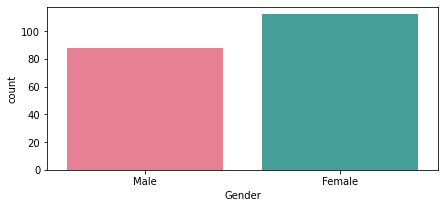

In [6]:
# Visualize the data distribution
plt.figure(figsize=(7,3))
sns.countplot(x='Gender', data=df, palette='husl')
plt.show()

<Figure size 1080x1080 with 0 Axes>

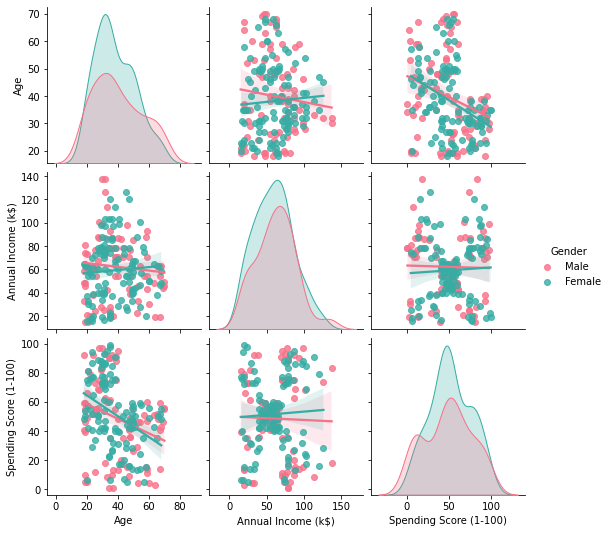

In [7]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df, hue="Gender", palette='husl', kind='reg',
            vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
plt.show()

## Data Preprocessing

In this section, we will preprocess data by implementing a scaling on the data and encoding the categorical column.

In [8]:
# Encoding the Gender column
mapping = {'Male': 1,
           'Female': 0}
df['Gender'] = df['Gender'].map(mapping)

In [9]:
# Scaling columns
col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaler.fit(df[col])
df_scaled = df.copy()
df_scaled[col] = scaler.transform(df[col])

In [13]:
# PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pd.DataFrame(data = pca.transform(df_scaled), columns=['PC1', 'PC2'])

## Creating Cluster

c:\Users\NEGATIVE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


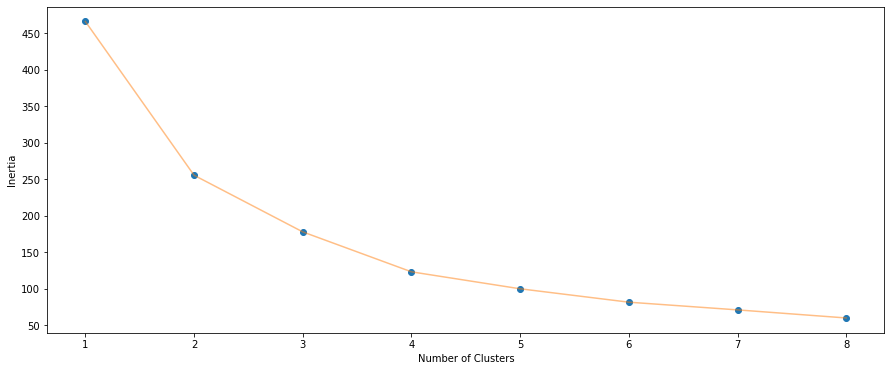

In [14]:
# Clustering
inertia = []
k_range = [k for k in range(1,9)]
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(k_range , inertia , 'o')
plt.plot(k_range , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

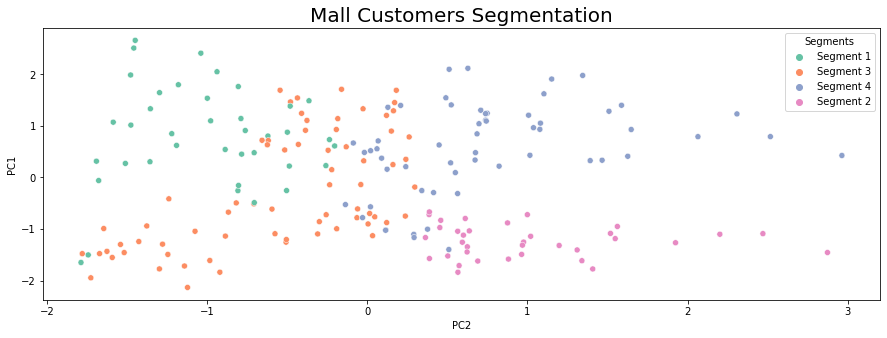

In [15]:
# KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

# Clusters
clusters = kmeans.labels_
df_cluster = df.copy()
df_cluster['Segments'] = clusters
df_cluster['Segments'] = df_cluster['Segments'].replace([0, 1, 2, 3], 
                                                    ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4'])

#Converting embedded data into dataframe for better visualization purpose
std_df = pd.DataFrame(df_pca, index = df_pca.index, columns = ['PC1', 'PC2'])
std_df['Segments'] = df_cluster['Segments']

#Visualizing clusters 
plt.figure(figsize=(15,5))
plt.title('Mall Customers Segmentation', size = 20)
sns.scatterplot(x = 'PC2', y = 'PC1', data = std_df, hue = 'Segments', palette='Set2')
plt.show()



In [16]:
#Number of customers in each segment
segment_count = df_cluster['Segments'].value_counts()
print(segment_count)

Segment 3    69
Segment 4    58
Segment 1    38
Segment 2    35
Name: Segments, dtype: int64


## Cluster Exploration

In [26]:
# Gender Inverse Mapping
mapping = {1 : 'Male',
            0 : 'Female'}
df_cluster['Gender'] = df_cluster['Gender'].map(mapping)

<Figure size 1080x1080 with 0 Axes>

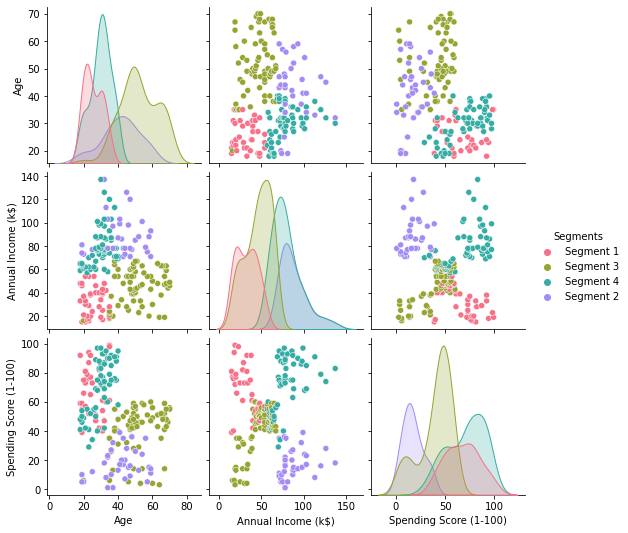

In [44]:
# numerical data exploration
plt.figure(figsize=(15,15))
sns.pairplot(data=df_cluster, hue="Segments", palette='husl',
            vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
plt.show()

In [27]:
# Explore cluster Segments 1
df_cluster[df_cluster["Segments"] == "Segment 1"].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,38.000000,38.000000,38.000000
mean,25.605263,32.631579,67.500000
std,5.268671,12.347275,16.853502
min,18.000000,15.000000,39.000000
25%,21.000000,20.250000,54.250000
50%,24.000000,33.000000,69.000000
75%,30.750000,41.500000,78.500000
max,35.000000,54.000000,99.000000


<b>Based on the above :</b>
- cluster "Segment 1" has average age 25, with the youngest age is 18 and the older age is 35
- cluster "Segment 1" has average annual income 33k USD, with the lowest income is 15k USD and the highest income is 54k USD
- cluster "Segment 1" has average spending 67, with the lowest spending score is 39 and the highest spending score 99

In [28]:
# Explore cluster Segments 2
df_cluster[df_cluster["Segments"] == "Segment 2"].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,35.000000,35.000000,35.000000
mean,41.685714,88.228571,17.285714
std,10.897305,16.367266,10.211215
min,19.000000,71.000000,1.000000
25%,35.000000,77.500000,10.000000
50%,43.000000,85.000000,16.000000
75%,47.500000,97.500000,23.500000
max,59.000000,137.000000,39.000000


<b>Based on the above :</b>
- cluster "Segment 2" has average age 41, with the youngest age is 19 and the older age is 59
- cluster "Segment 2" has average annual income 88k USD, with the lower income is 71k USD and the higher income is 137k USD
- cluster "Segment 2: has average spending score 17, with the lowest spending score is 1 and highest spending score is 39.

In [29]:
# Explore cluster Segments 3
df_cluster[df_cluster["Segments"] == "Segment 3"].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,69.000000,69.000000,69.000000
mean,52.144928,46.333333,40.072464
std,10.884792,14.871673,16.176707
min,20.000000,16.000000,3.000000
25%,46.000000,37.000000,35.000000
50%,50.000000,48.000000,46.000000
75%,60.000000,60.000000,51.000000
max,70.000000,67.000000,60.000000


<b>Based on the above :</b>
- cluster "Segment 3" has average age 52, with the youngest age is 20 and the older age is 70
- cluster "Segment 3" has average annual income 46k USD, with the lower income is 16k USD and the higher income is 67k USD
- cluster "Segment 3: has average spending score 46, with the lowest spending score is 3 and highest spending score is 60.

In [30]:
# Explore cluster Segments 4
df_cluster[df_cluster["Segments"] == "Segment 4"].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,58.000000,58.000000,58.000000
mean,30.000000,79.086207,70.775862
std,5.958924,17.362275,18.699886
min,18.000000,57.000000,29.000000
25%,27.000000,67.500000,55.000000
50%,30.500000,76.000000,74.500000
75%,34.000000,87.000000,87.750000
max,40.000000,137.000000,97.000000


<b>Based on the above :</b>
- cluster "Segment 4" has average age 30, with the youngest age is 18 and the older age is 40
- cluster "Segment 4" has average annual income 79k USD, with the lower income is 57k USD and the higher income is 137k USD
- cluster "Segment 4: has average spending score 74, with the lowest spending score is 29 and highest spending score is 97.